In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("uber.csv")
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [3]:
df.dropna(inplace=True)

In [4]:
def haversine(lat1, lon1, lat2, lon2):
    R=6371
    dlat=np.radians(lat2-lat1)
    dlon=np.radians(lon2-lon1)
    a = np.sin(dlat/2)**2 + np.cos(np.radians(lat1))*np.cos(np.radians(lat2))*np.sin(dlon/2)**2
    c = 2*np.arctan2(np.sqrt(a),np.sqrt(1-a))
    return a*c

In [5]:
df['distance'] = df.apply(lambda row:haversine(row['pickup_longitude'],row['pickup_latitude'],row['dropoff_longitude'],row['dropoff_latitude']),axis=1)

In [6]:
from scipy.stats import zscore
df = df[(np.abs(zscore(df['fare_amount'])))<3 & (np.abs(zscore(df['distance']))<3)]
df

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1,9.731595e-14
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1,3.022762e-13
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1,1.084950e-10
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3,1.941431e-12
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5,1.496981e-10
...,...,...,...,...,...,...,...,...,...,...
199994,3189201,2014-01-31 14:42:00.000000181,12.0,2014-01-31 14:42:00 UTC,-73.983070,40.760770,-73.972972,40.754177,1,1.435809e-12
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1,2.555327e-16
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1,1.408222e-11
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1,5.639014e-12


<Axes: ylabel='fare_amount'>

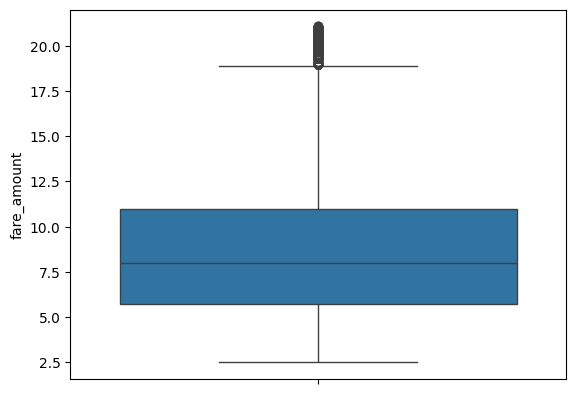

In [7]:
sns.boxplot(df['fare_amount'])

<Axes: ylabel='distance'>

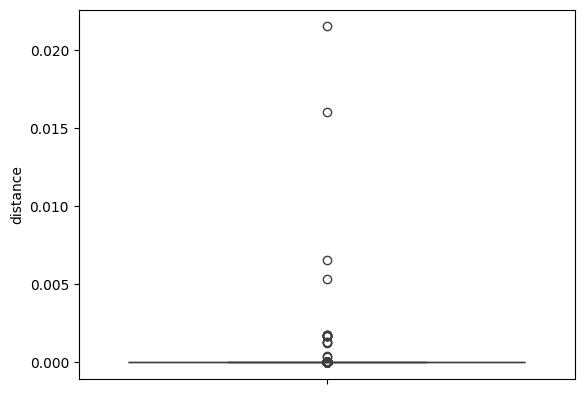

In [8]:
sns.boxplot(df['distance'])

In [9]:
low = df['fare_amount'].quantile(0.05)
high = df['fare_amount'].quantile(0.95)
df = df[(low<df['fare_amount']) & (df['fare_amount']<high)]

<Axes: xlabel='distance', ylabel='fare_amount'>

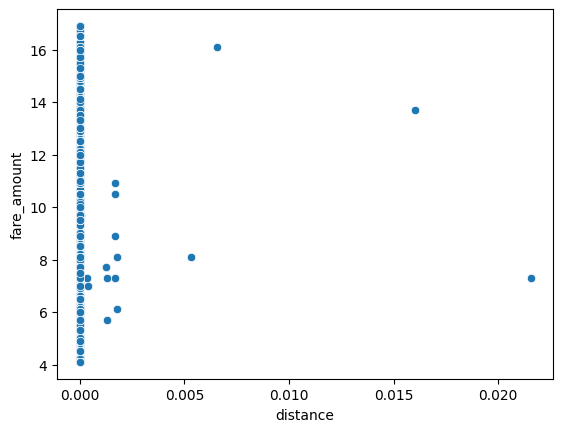

In [10]:
sns.scatterplot(x=df['distance'],y=df['fare_amount'])

In [11]:
df['pickup_time']=pd.to_datetime(df['pickup_datetime'])
df['hour']=df['pickup_time'].dt.hour
df['day_of_week']=df['pickup_time'].dt.dayofweek

In [12]:
df=df.drop(['key','pickup_datetime'],axis=1)

<Axes: >

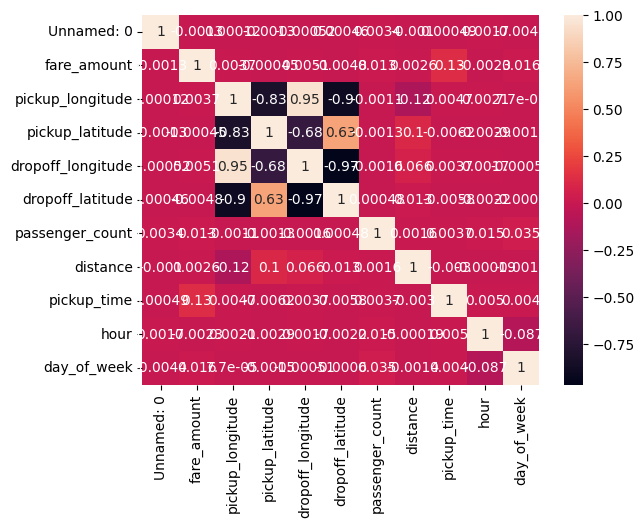

In [14]:
corr = df.corr()
sns.heatmap(corr, annot=True)

In [16]:
from sklearn.model_selection import train_test_split
x= df[['distance','hour','day_of_week']]
y= df['fare_amount']

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [18]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(x_train,y_train)
y_pred_lr = lr_model.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
def evaluate(y_test, y_pred):
    r2 = r2_score(y_test, y_pred)
    rmse = 